# ML Regression project

## Introduction to the project

#### Goal:

Predict the weight of newborn children based on given features.

#### Problem Definition:

We aim to understand the factors that influence the weight of a newborn child and develop a predictive model using machine learning algorithms. This will provide valuable insights for healthcare professionals and parents, allowing them to anticipate and monitor newborn weight.

#### Decision makers/stakeholders:

The primary decision makers and stakeholders for this project include healthcare professionals, researchers in the field of prenatal care, and parents who are interested in understanding the factors affecting newborn weight.

#### Criteria for success:

The success of the project will be measured based on the accuracy of the weight predictions for the newborn children. 

#### Constraints:

The work will be limited only to the given dataset and available functions, so factors beyond the provided dataset will not be considered.

#### Approach:

We will apply various machine learning algorithms to build a model for predicting newborn weight based on the given features.
Three different algorithms such as Linear Regression, Decision Trees, and Random Forest, will be considered.
Additional algorithms like Lasso, SVR, and Gradient Boosting can also be applied to compare their performance.
The algorithms will be trained on the training sample and evaluated using the MAPE metric on the validation set.
The algorithm with the lowest MAPE on the validation set will be selected as the final model.
The chosen algorithm will then be used to make predictions on the test sample to estimate newborn weights.


# 1. Data description

The dataset contains 2,398,116 records (rows) in the training sample and 599,561 in the test sample and 14 features (columns).


|Feature|Description|
|-------|-----------|
|mother_body_mass_index| Body Mass Index of the mother (continuous numerical)|
|mother_marital_status| categorical: 1 = Yes, mother is married , 2 = Not married|
|mother_delivery_weight| Weight of the mother at delivery in pounds (continuous numerical)|
|mother_race| Race of the mother (categorical: 1 = White (alone), 2 = Black (alone), 3 = AIAN (alone), 4 = Asian (alone) 5 = NHOPI (alone), 6 = More than one race)|
|mother_height| Height of the mother in inches (continuous numerical)|
|mother_weight_gain| Weight gain of the mother during pregnancy in pounds (continuous numerical)|
|father_age| Age of the father (continuous numerical)|
|father_education| Education level of the father (categorical: 1 = 8th grade or less, 2 = 9-12th grade, no diploma, 3 = High school graduate or GED completed, 4 = Some college credit but no degree, 5 = Associate degree, 6 = Bachelor's degree, 7 = Master's degree, 8 = Doctorate or Professional degree, 9 = unknown)|
|cigarettes_before_pregnancy| Number of cigarettes smoked daily by the mother before pregnancy (00-97 = number of cigarettes daily, 98 = 98 or more cigarettes daily) (continuous numerical)|
|prenatal_care_month| Pregnancy month in which prenatal care began (continuous numerical 99 = no prenatal care)|
|number_prenatal_visits| Number of prenatal visits (continuous numerical)|
|previous_cesarean| Indicates if there was any previous cesarean delivery before (categorical: N = No, Y = Yes, U = Other)|
|newborn_gender| Gender of the newborn (categorical: F = female, M = male)|
|newborn_weight| Weight of the newborn in grams (continuous numerical, only available in the training sample)|

### Dependencies loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_breusch_godfrey
from scipy.stats import jarque_bera



/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# 2. Data preparation

Reading the dataset

In [2]:
newborn_train = pd.read_csv('../data/newborn_train.csv')
newborn_test = pd.read_csv('../data/newborn_test.csv')


In [3]:
newborn_test.head(10)

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender
0,22.3,1.0,149.0,4,63.0,23.0,30.0,6,0.0,2,15.0,N,F
1,27.4,1.0,198.0,1,67.0,23.0,28.0,3,0.0,4,16.0,N,F
2,24.7,2.0,164.0,2,64.0,20.0,22.0,2,0.0,2,11.0,N,F
3,34.7,2.0,235.0,1,66.0,20.0,24.0,3,0.0,2,13.0,N,M
4,35.7,NaN,213.0,2,64.0,5.0,NaN,9,0.0,3,9.0,N,F
5,34.8,1.0,196.0,1,61.0,12.0,30.0,3,0.0,3,11.0,Y,M
6,27.4,2.0,214.0,2,67.0,39.0,28.0,3,0.0,2,14.0,N,M
7,NaN,NaN,NaN,1,NaN,NaN,43.0,2,0.0,2,12.0,Y,F
8,23.0,1.0,155.0,4,63.0,25.0,NaN,8,0.0,3,12.0,Y,F
9,39.9,2.0,236.0,1,63.0,11.0,21.0,3,0.0,1,11.0,N,M


view the first few rows of the data:

In [4]:
newborn_train.head(10)

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight
0,30.8,2.0,220.0,1,65.0,35.0,29.0,6,0.0,2,10.0,N,F,3045
1,45.8,NaN,293.0,1,64.0,26.0,37.0,4,0.0,3,10.0,N,F,3061
2,NaN,1.0,NaN,1,66.0,NaN,33.0,6,0.0,3,NaN,N,F,3827
3,24.3,1.0,157.0,1,NaN,20.0,27.0,6,0.0,3,9.0,N,M,3997
4,24.1,1.0,187.0,1,65.0,42.0,29.0,8,0.0,2,12.0,N,F,3240
5,30.9,2.0,231.0,1,NaN,51.0,27.0,3,0.0,4,10.0,N,M,3544
6,22.9,1.0,141.0,1,NaN,16.0,33.0,3,0.0,4,8.0,N,M,3010
7,28.3,NaN,182.0,1,65.0,12.0,NaN,5,11.0,3,15.0,N,M,3856
8,40.7,1.0,NaN,1,63.0,NaN,37.0,4,0.0,3,9.0,Y,M,1015
9,36.3,1.0,274.0,1,71.0,14.0,33.0,3,0.0,2,14.0,N,F,4450


Some of the values are missing or represented as NaN in the sample. You may need to handle these missing values during data preprocessing. In the next step we will try to handle these missing values during data preprocessing.

The summary statistics provide an overview of the distribution and range of values in each numerical column.

In [5]:
newborn_train.describe()

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,newborn_weight
count,2.251516e+06,1.985606e+06,2.363158e+06,2.398116e+06,2.153587e+06,2.324643e+06,1.953610e+06,2.398116e+06,2.386815e+06,2.398116e+06,2.338215e+06,2.398116e+06
mean,2.716721e+01,1.399560e+00,1.883170e+02,1.522342e+00,6.412125e+01,2.948373e+01,3.180109e+01,4.904241e+00,1.104388e+00,5.295876e+00,1.129318e+01,3.261835e+03
std,6.755758e+00,4.898080e-01,4.136924e+01,1.111554e+00,2.835525e+00,1.514630e+01,6.812647e+00,2.305806e+00,4.730520e+00,1.505508e+01,4.197046e+00,5.904724e+02
min,1.300000e+01,1.000000e+00,1.000000e+02,1.000000e+00,3.000000e+01,0.000000e+00,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.270000e+02
25%,2.230000e+01,1.000000e+00,1.590000e+02,1.000000e+00,6.200000e+01,2.000000e+01,2.700000e+01,3.000000e+00,0.000000e+00,2.000000e+00,9.000000e+00,2.960000e+03
50%,2.570000e+01,1.000000e+00,1.810000e+02,1.000000e+00,6.400000e+01,2.900000e+01,3.100000e+01,4.000000e+00,0.000000e+00,3.000000e+00,1.200000e+01,3.300000e+03
75%,3.070000e+01,2.000000e+00,2.100000e+02,2.000000e+00,6.600000e+01,3.800000e+01,3.600000e+01,6.000000e+00,0.000000e+00,3.000000e+00,1.300000e+01,3.629000e+03
max,6.980000e+01,2.000000e+00,4.000000e+02,6.000000e+00,7.800000e+01,9.800000e+01,9.800000e+01,9.000000e+00,9.800000e+01,9.900000e+01,9.800000e+01,8.165000e+03


In [6]:
newborn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398116 entries, 0 to 2398115
Data columns (total 14 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   mother_body_mass_index       float64
 1   mother_marital_status        float64
 2   mother_delivery_weight       float64
 3   mother_race                  int64  
 4   mother_height                float64
 5   mother_weight_gain           float64
 6   father_age                   float64
 7   father_education             int64  
 8   cigarettes_before_pregnancy  float64
 9   prenatal_care_month          int64  
 10  number_prenatal_visits       float64
 11  previous_cesarean            object 
 12  newborn_gender               object 
 13  newborn_weight               int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 256.1+ MB


The column 'mother_marital_status', 'mother_race', 'father_education', 'previous_cesarean', 'newborn_gender' should be converted to a categorical data type.

In [7]:
# Converting columns to categorical data type
convert_to_category = ['mother_marital_status', 'mother_race', 'father_education', 'previous_cesarean', 'newborn_gender']
newborn_train[convert_to_category] = newborn_train[convert_to_category].astype('category')

# the same for test
convert_to_category_test = ['mother_marital_status', 'mother_race', 'father_education', 'previous_cesarean', 'newborn_gender']
newborn_test[convert_to_category_test] = newborn_test[convert_to_category_test].astype('category')

# View the updated data types
newborn_train.dtypes

mother_body_mass_index          float64
mother_marital_status          category
mother_delivery_weight          float64
mother_race                    category
mother_height                   float64
mother_weight_gain              float64
father_age                      float64
father_education               category
cigarettes_before_pregnancy     float64
prenatal_care_month               int64
number_prenatal_visits          float64
previous_cesarean              category
newborn_gender                 category
newborn_weight                    int64
dtype: object

mother_height, mother_weight_gain, father_age, cigarettes_before_pregnancy, number_prenatal_visits should be integers but we will change types of them after handle with missing values.

In [8]:
newborn_train.shape

(2398116, 14)

#### Dealing with missing values

In [9]:
# Checking the number of missing values in each column
missing_values = newborn_train.isnull().sum()
print(missing_values)

mother_body_mass_index         146600
mother_marital_status          412510
mother_delivery_weight          34958
mother_race                         0
mother_height                  244529
mother_weight_gain              73473
father_age                     444506
father_education                    0
cigarettes_before_pregnancy     11301
prenatal_care_month                 0
number_prenatal_visits          59901
previous_cesarean                   0
newborn_gender                      0
newborn_weight                      0
dtype: int64


For dealing with the problem of missing values we can:
- remove missing variables/columns but we can consider it when the variable has more than ~10% missings and is not crucial for the analysis
- fill in the missing values


So we will calculate the percentage of missing values for each column in the dataset to check if a variable has more than 10% missing values.

In [10]:
# Calculate the percentage of missing values for each column
missing_percentage = newborn_train.isnull().sum() / len(newborn_train) * 100

# Check if any variable has more than 10% missing values
variables_with_high_missing = missing_percentage[missing_percentage > 10]

# Print the variables with more than 10% missing values
print(variables_with_high_missing)

mother_marital_status    17.201420
mother_height            10.196713
father_age               18.535634
dtype: float64


Father_age and Mother_height might have some influence on newborn weight due to potential genetic factors.Mother_marital_status might not have a direct impact on predicting newborn weight but it could potentially be associated with other factors such as social support or access to healthcare. So we won't remove any variable.

We can fill in the missing values for continuous variables using:
- constant (like 0 - the missing values are equivalent to zero or have no impact on the analysis)
- statistics like: mean/median/mode (globally or in the subgroup)
- random value from assumed distribution - for this one we need to check the distribution of the variable.


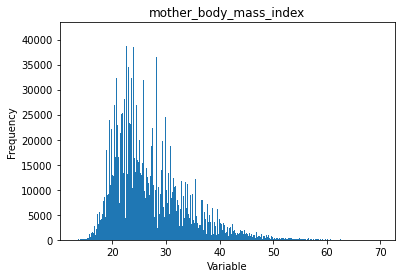

/home/ubuntu/.local/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test statistic: nan
p-value: 1.0


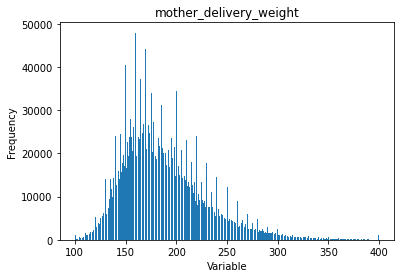

Shapiro-Wilk test statistic: nan
p-value: 1.0


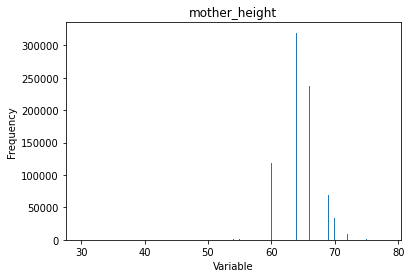

Shapiro-Wilk test statistic: nan
p-value: 1.0


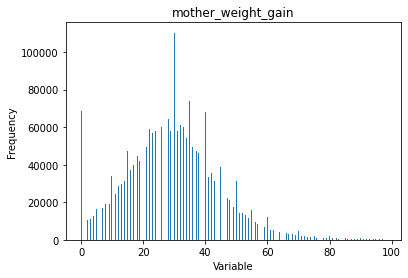

Shapiro-Wilk test statistic: nan
p-value: 1.0


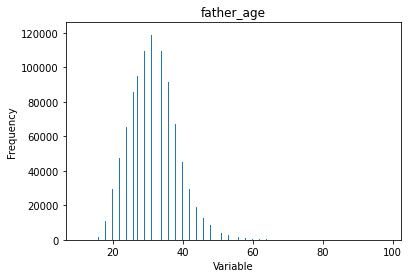

Shapiro-Wilk test statistic: nan
p-value: 1.0


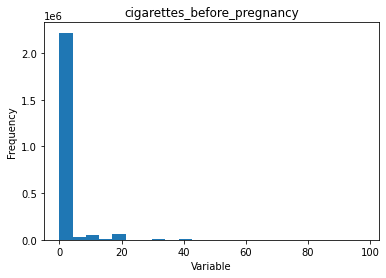

Shapiro-Wilk test statistic: nan
p-value: 1.0


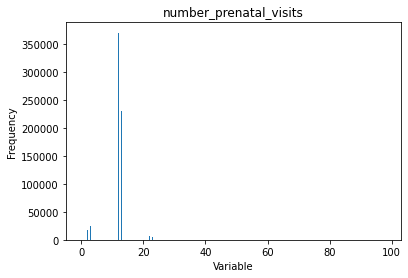

Shapiro-Wilk test statistic: nan
p-value: 1.0


In [11]:
# Plot a histogram
plt.hist(newborn_train['mother_body_mass_index'], bins='auto')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.title('mother_body_mass_index')
plt.show()

# Perform Shapiro-Wilk test
stat, p = stats.shapiro(newborn_train['mother_body_mass_index'])
print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)

plt.hist(newborn_train['mother_delivery_weight'], bins='auto')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.title('mother_delivery_weight')
plt.show()

stat, p = stats.shapiro(newborn_train['mother_delivery_weight'])
print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)

plt.hist(newborn_train['mother_height'], bins='auto')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.title('mother_height')
plt.show()

stat, p = stats.shapiro(newborn_train['mother_height'])
print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)

plt.hist(newborn_train['mother_weight_gain'], bins='auto')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.title('mother_weight_gain')
plt.show()

stat, p = stats.shapiro(newborn_train['mother_weight_gain'])
print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)

plt.hist(newborn_train['father_age'], bins='auto')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.title('father_age')
plt.show()

stat, p = stats.shapiro(newborn_train['father_age'])
print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)

plt.hist(newborn_train['cigarettes_before_pregnancy'], bins='auto')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.title('cigarettes_before_pregnancy')
plt.show()

stat, p = stats.shapiro(newborn_train['cigarettes_before_pregnancy'])
print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)

plt.hist(newborn_train['number_prenatal_visits'], bins='auto')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.title('number_prenatal_visits')
plt.show()

stat, p = stats.shapiro(newborn_train['number_prenatal_visits'])
print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)


None has a normal distribution, nor in any variable can be replaced by zero, so we will use mean.

In [12]:
newborn_train['mother_body_mass_index'] = newborn_train['mother_body_mass_index'].fillna(newborn_train['mother_body_mass_index'].mean())
newborn_train['mother_delivery_weight'] = newborn_train['mother_delivery_weight'].fillna(newborn_train['mother_delivery_weight'].mean())
newborn_train['mother_height'] = newborn_train['mother_height'].fillna(newborn_train['mother_height'].mean())
newborn_train['mother_weight_gain'] = newborn_train['mother_weight_gain'].fillna(newborn_train['mother_weight_gain'].mean())
newborn_train['father_age'] = newborn_train['father_age'].fillna(newborn_train['father_age'].mean())
newborn_train['cigarettes_before_pregnancy'] = newborn_train['cigarettes_before_pregnancy'].fillna(newborn_train['cigarettes_before_pregnancy'].mean())
newborn_train['number_prenatal_visits'] = newborn_train['number_prenatal_visits'].fillna(newborn_train['number_prenatal_visits'].mean())

# the same for test sample
newborn_test['mother_body_mass_index'] = newborn_test['mother_body_mass_index'].fillna(newborn_test['mother_body_mass_index'].mean())
newborn_test['mother_delivery_weight'] = newborn_test['mother_delivery_weight'].fillna(newborn_test['mother_delivery_weight'].mean())
newborn_test['mother_height'] = newborn_test['mother_height'].fillna(newborn_test['mother_height'].mean())
newborn_test['mother_weight_gain'] = newborn_test['mother_weight_gain'].fillna(newborn_test['mother_weight_gain'].mean())
newborn_test['father_age'] = newborn_test['father_age'].fillna(newborn_test['father_age'].mean())
newborn_test['cigarettes_before_pregnancy'] = newborn_test['cigarettes_before_pregnancy'].fillna(newborn_test['cigarettes_before_pregnancy'].mean())
newborn_test['number_prenatal_visits'] = newborn_test['number_prenatal_visits'].fillna(newborn_test['number_prenatal_visits'].mean())


We can fill in the missing values for categorical variables using:
- encode missing as additional “missing” category
- replace with mode (globally or in the subgroup)
- or replace randomly from non-missings

We will encode missing values in the 'mother_marital_status' column as an additional "missing" category

In [13]:
newborn_train['mother_marital_status'] = newborn_train['mother_marital_status'].cat.add_categories(['Unknown'])
newborn_train['mother_marital_status'].fillna('Unknown', inplace=True)

# the same for test sample
newborn_test['mother_marital_status'] = newborn_test['mother_marital_status'].cat.add_categories(['Unknown'])
newborn_test['mother_marital_status'].fillna('Unknown', inplace=True)


Now we will check if there is any remaining missing value in our dataset:

In [14]:
newborn_train.isna().values.sum()

0

It means that now our database is complete and now we can convert columns to integer data type

In [15]:
# Converting columns to integer data type
convert_to_int = ['mother_height', 'mother_weight_gain', 'father_age', 'cigarettes_before_pregnancy', 'number_prenatal_visits']
newborn_train[convert_to_int] = newborn_train[convert_to_int].astype(int)

# the same for test sample
convert_to_int_test = ['mother_height', 'mother_weight_gain', 'father_age', 'cigarettes_before_pregnancy', 'number_prenatal_visits']
newborn_test[convert_to_int_test] = newborn_test[convert_to_int_test].astype(int)

# View the updated data types
newborn_train.dtypes

mother_body_mass_index          float64
mother_marital_status          category
mother_delivery_weight          float64
mother_race                    category
mother_height                     int64
mother_weight_gain                int64
father_age                        int64
father_education               category
cigarettes_before_pregnancy       int64
prenatal_care_month               int64
number_prenatal_visits            int64
previous_cesarean              category
newborn_gender                 category
newborn_weight                    int64
dtype: object

# 3. Exploratory Data Analysis

First we will check the descriptive statistics for the target variable.

In [16]:
target_stats = newborn_train['newborn_weight'].describe()
print(target_stats)

count    2.398116e+06
mean     3.261835e+03
std      5.904724e+02
min      2.270000e+02
25%      2.960000e+03
50%      3.300000e+03
75%      3.629000e+03
max      8.165000e+03
Name: newborn_weight, dtype: float64


In [17]:
target_skewness = stats.skew(newborn_train['newborn_weight'])
target_kurtosis = stats.kurtosis(newborn_train['newborn_weight'])
target_quantiles = newborn_train['newborn_weight'].quantile([0.25, 0.5, 0.75])

print('Skewness:', target_skewness)
print('Kurtosis:', target_kurtosis)
print('Quantiles:')
print(target_quantiles)


Skewness: -0.8634864843468809
Kurtosis: 2.722141726328787
Quantiles:
0.25    2960.0
0.50    3300.0
0.75    3629.0
Name: newborn_weight, dtype: float64


Based on this results we can conclude that the distribution is slightly skewed to the left. Kurtosis indicates that the distribution has slightly heavier tails than a normal distribution (which has a kurtosis of 3). It suggests that the distribution has more outliers or extreme values than a normal distribution.

Now we will look at distribution of target variable

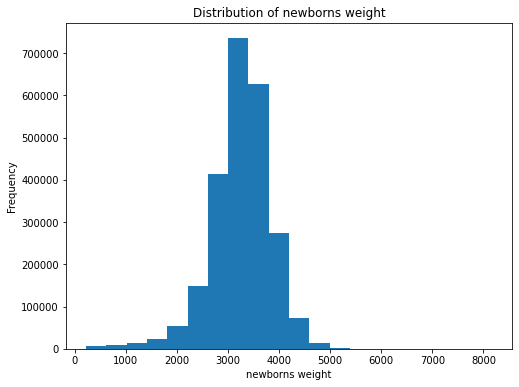

In [18]:
# histogram of newborn_weight
plt.figure(figsize=(8, 6))
plt.hist(newborn_train['newborn_weight'], bins=20)
plt.xlabel('newborns weight')
plt.ylabel('Frequency')
plt.title('Distribution of newborns weight')
plt.show()

Distribution appears to be close to normal. Now wi will check violin plot. The width of the violin represents the frequency.

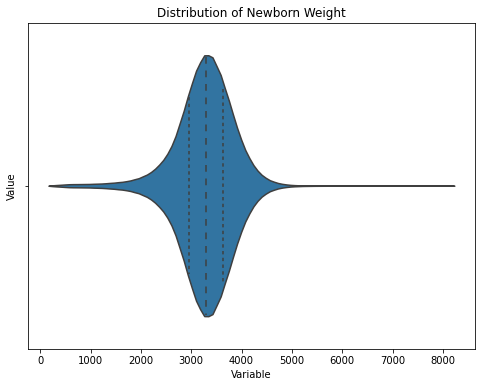

In [19]:
# violin plot of newborn_weight
plt.figure(figsize=(8, 6))
sns.violinplot(x=newborn_train['newborn_weight'], inner="quartile")
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Distribution of Newborn Weight')
plt.show()



We can see from the plot that most newborn's weight is between 2500 and 4500. The dashed lines represent the locations of the three quartiles Q1, Q2 and Q3. Now we will check the box plot to see any potential outliers as individual points beyond the whiskers

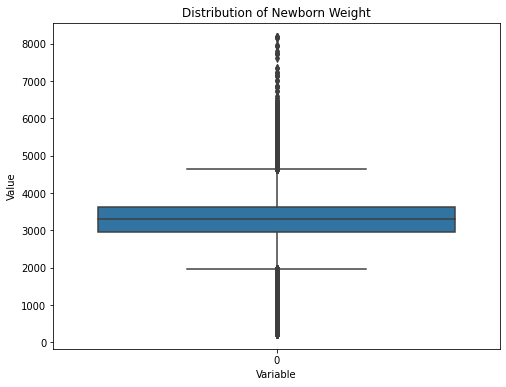

In [20]:
# boxplot plot of newborn_weight
plt.figure(figsize=(8, 6))
sns.boxplot(newborn_train['newborn_weight'])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Distribution of Newborn Weight')
plt.show()


We can see that there are many outliers so we will check also distributions of other variables.

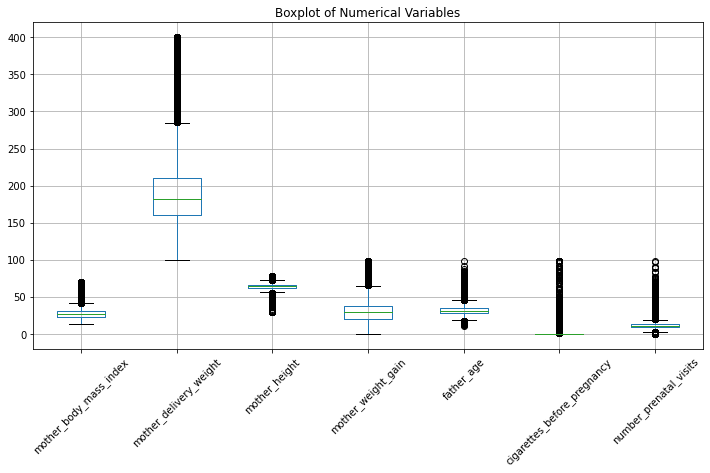

<Figure size 864x432 with 0 Axes>

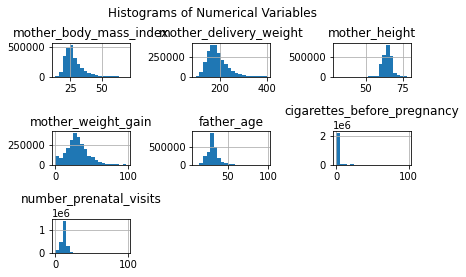

In [21]:
# boxplots for numerical variables
numerical_vars = ['mother_body_mass_index', 'mother_delivery_weight', 'mother_height', 'mother_weight_gain', 'father_age', 'cigarettes_before_pregnancy', 'number_prenatal_visits']
plt.figure(figsize=(12, 6))
newborn_train[numerical_vars].boxplot()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

# histograms for numerical variables
plt.figure(figsize=(12, 6))
newborn_train[numerical_vars].hist(bins=20)
plt.suptitle('Histograms of Numerical Variables', y=0.95)
plt.tight_layout()
plt.show()


<ipython-input-22-792fb296e523>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = newborn_train.corr()


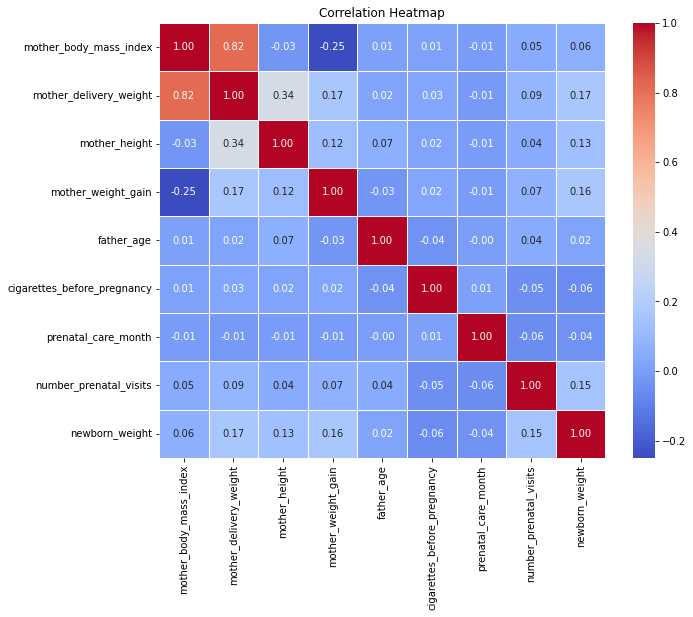

In [22]:
# the correlation matrix
corr_matrix = newborn_train.corr()

# setting up the figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 8))

# correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)

plt.title('Correlation Heatmap')
plt.show()

In this case, the correlation coefficient of 0.82 suggests a strong positive linear relationship between the mother's BMI and her delivery weight, which make sense because as the mother's BMI increases, there is a tendency for her delivery weight to also increase, and vice versa.

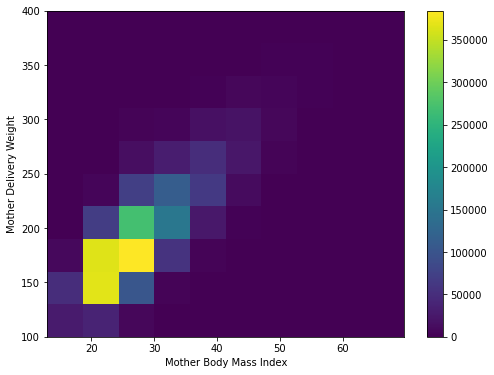

In [23]:
plt.rc("grid", linewidth=0.05)
fig, ax = plt.subplots(figsize=(8, 6))

h = ax.hist2d(newborn_train["mother_body_mass_index"], 
              newborn_train["mother_delivery_weight"],
              cmap="viridis")
ax.set(xlabel="Mother Body Mass Index", ylabel="Mother Delivery Weight")
plt.colorbar(h[3], ax=ax)

plt.rc("grid", linewidth=0.25)
plt.show()



In [24]:
# calculation the correlation 
corr, p_value = pearsonr(newborn_train['mother_body_mass_index'], newborn_train['mother_delivery_weight'])

print("Correlation:", corr)
print("p-value:", p_value)

Correlation: 0.8153167666279049
p-value: 0.0


We can see the strong correlation between this pair and the highest concentration of data is when body mass index of mother is between 20 and 30 and when delivery weight is between 125 and 200. We can also see that  correlation coefficient between this two variables is 0.815 so this indicates a strong positive linear relationship. The p-value of 0.0 suggests that the observed correlation is statistically significant.

# 4. Feature Engineering

Now, we will use above section to engineer the features of our dataset.

Based on the strong positive correlation between "Mother Body Mass Index" and "Mother Delivery Weight" we will create a new feature that combines information from both variables capture the relationship between the two variables more effectively.


In [25]:
# creating a new feature by calculating the ratio
newborn_train['body_mass_index_to_delivery_weight'] = newborn_train['mother_body_mass_index'] / newborn_train['mother_delivery_weight']
newborn_train.drop(["mother_body_mass_index", "mother_delivery_weight"], axis=1, inplace=True)

# the same for test sample
newborn_test['body_mass_index_to_delivery_weight'] = newborn_test['mother_body_mass_index'] / newborn_test['mother_delivery_weight']
newborn_test.drop(["mother_body_mass_index", "mother_delivery_weight"], axis=1, inplace=True)


After creating new variable and removing mother_body_mass_index and mother_delivery_weight we will check some basic statistics.

In [26]:
newborn_train['body_mass_index_to_delivery_weight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2398116 entries, 0 to 2398115
Series name: body_mass_index_to_delivery_weight
Non-Null Count    Dtype  
--------------    -----  
2398116 non-null  float64
dtypes: float64(1)
memory usage: 18.3 MB


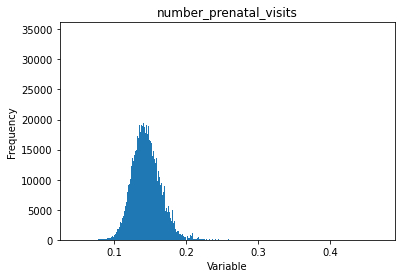

In [27]:
plt.hist(newborn_train['body_mass_index_to_delivery_weight'], bins='auto')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.title('number_prenatal_visits')
plt.show()

### Encoding Categorical Variables

We can see that this dataset contains categorical variables and we need to encodem them because machine learning models accept only numbers as input.

In [28]:
print("Unique values in 'mother_marital_status' column:")
print(newborn_train['mother_marital_status'].unique().tolist())

print("Unique values in 'mother_race' column:")
print(newborn_train['mother_race'].unique().tolist())

print("Unique values in 'father_education' column:")
print(newborn_train['father_education'].unique().tolist())

print("Unique values in 'previous_cesarean' column:")
print(newborn_train['previous_cesarean'].unique().tolist())

print("Unique values in 'newborn_gender' column:")
print(newborn_train['newborn_gender'].unique().tolist())

Unique values in 'mother_marital_status' column:
[2.0, 'Unknown', 1.0]
Unique values in 'mother_race' column:
[1, 2, 4, 6, 3, 5]
Unique values in 'father_education' column:
[6, 4, 8, 3, 5, 9, 7, 2, 1]
Unique values in 'previous_cesarean' column:
['N', 'Y', 'U']
Unique values in 'newborn_gender' column:
['F', 'M']


We can assume that the unknown category in the marital variable will not be very usefull and meaningfull to predict newborn weight so we decided to remove this category.

In [29]:
# Removing 'Unknown' category
newborn_train = newborn_train[newborn_train['mother_marital_status'] != 'Unknown']

# Mapping values 1 to 0 and 2 to 1
newborn_train['mother_marital_status'] = newborn_train['mother_marital_status'].map({1: 0, 2: 1})

# Converting data type to integer
newborn_train['mother_marital_status'] = newborn_train['mother_marital_status'].astype(int)

# the same for test sample
newborn_test = newborn_test[newborn_test['mother_marital_status'] != 'Unknown']
newborn_test['mother_marital_status'] = newborn_test['mother_marital_status'].map({1: 0, 2: 1})
newborn_test['mother_marital_status'] = newborn_test['mother_marital_status'].astype(int)

# Checking the column after changes
unique_values = newborn_train['mother_marital_status'].unique()
print("Unique values in 'mother_marital_status' column after removing 'Unknown' and mapping values:")
print(unique_values)



Unique values in 'mother_marital_status' column after removing 'Unknown' and mapping values:
[1 0]


'mother_race' has multiple unique values representing different races so we will do one-hot encoding where each unique value is transformed into a binary column indicating the presence or absence of that race.

In [30]:
# one-hot encoding 
race_encoded = pd.get_dummies(newborn_train['mother_race'], prefix='mother_race')
race_encoded.columns = ['mother_race_white', 'mother_race_black', 'mother_race_aian', 'mother_race_asian', 'mother_race_nhopi', 'mother_race_more_than_one']

# concatenate the encoded columns with the rest 
newborn_train = pd.concat([newborn_train, race_encoded], axis=1)

# removing original column
newborn_train.drop('mother_race', axis=1, inplace=True)

# the same for test sample
race_encoded_test = pd.get_dummies(newborn_test['mother_race'], prefix='mother_race')
race_encoded_test.columns = ['mother_race_white', 'mother_race_black', 'mother_race_aian', 'mother_race_asian', 'mother_race_nhopi', 'mother_race_more_than_one']
newborn_test = pd.concat([newborn_test, race_encoded_test], axis=1)
newborn_test.drop('mother_race', axis=1, inplace=True)

# View of new columns
race_encoded.head()




,mother_race_white,mother_race_black,mother_race_aian,mother_race_asian,mother_race_nhopi,mother_race_more_than_one
0,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0


The best way to represents the education level of the father in 'father_education' column is to assign 1 to lowest education level and increment the values as the education level increases (already done) and to remove 9-unknown because they do not seem to be meaningful to predict our target variable.

In [31]:
# removing rows with value = 9
newborn_train = newborn_train[newborn_train['father_education'] != 9]

# converting 'father_education' as integer 
newborn_train['father_education'] = newborn_train['father_education'].astype('Int32')

# the same for test sample
newborn_test = newborn_test[newborn_test['father_education'] != 9]
newborn_test['father_education'] = newborn_test['father_education'].astype('Int32')

# checking the column after changes
newborn_train['father_education'].unique()

<IntegerArray>
[6, 8, 3, 4, 7, 5, 2, 1]
Length: 8, dtype: Int32


'previous_cesarean' and 'newborn_gender' will be encoded as 1 and 0. U - other will be removed.

In [32]:
# removing 'Unknown' category 
newborn_train = newborn_train[newborn_train['previous_cesarean'] != 'U']

# encode previous_cesarean
newborn_train['previous_cesarean'] = newborn_train['previous_cesarean'].map({'Y': 1, 'N': 0})

# encode newborn_gender
newborn_train['newborn_gender'] = newborn_train['newborn_gender'].map({'F': 1, 'M': 0})

# converting data type as integers
newborn_train['previous_cesarean'] = newborn_train['previous_cesarean'].astype(int)
newborn_train['newborn_gender'] = newborn_train['newborn_gender'].astype(int)

# the same for test sample
newborn_test = newborn_test[newborn_test['previous_cesarean'] != 'U']
newborn_test['previous_cesarean'] = newborn_test['previous_cesarean'].map({'Y': 1, 'N': 0})
newborn_test['newborn_gender'] = newborn_test['newborn_gender'].map({'F': 1, 'M': 0})
newborn_test['previous_cesarean'] = newborn_test['previous_cesarean'].astype(int)
newborn_test['newborn_gender'] = newborn_test['newborn_gender'].astype(int)

# checking the column after changes
newborn_train['previous_cesarean'].head()
newborn_train['newborn_gender'].head()

0    1
2    1
3    0
4    1
5    0
Name: newborn_gender, dtype: int64

In [33]:
newborn_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708062 entries, 0 to 2398115
Data columns (total 18 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   mother_marital_status               int64  
 1   mother_height                       int64  
 2   mother_weight_gain                  int64  
 3   father_age                          int64  
 4   father_education                    Int32  
 5   cigarettes_before_pregnancy         int64  
 6   prenatal_care_month                 int64  
 7   number_prenatal_visits              int64  
 8   previous_cesarean                   int64  
 9   newborn_gender                      int64  
 10  newborn_weight                      int64  
 11  body_mass_index_to_delivery_weight  float64
 12  mother_race_white                   uint8  
 13  mother_race_black                   uint8  
 14  mother_race_aian                    uint8  
 15  mother_race_asian                   uint8  
 16  

In [34]:
# numerical values without scientific notation
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

# describe dataset
description = newborn_train.describe().apply(lambda x: x.apply('{:.2f}'.format))

# reset the display options to default
pd.reset_option('display.float_format')
description



,mother_marital_status,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight,body_mass_index_to_delivery_weight,mother_race_white,mother_race_black,mother_race_aian,mother_race_asian,mother_race_nhopi,mother_race_more_than_one
count,1708062.00,1708062.00,1708062.00,1708062.00,1708062.00,1708062.00,1708062.00,1708062.00,1708062.00,1708062.00,1708062.00,1708062.00,1708062.00,1708062.00,1708062.00,1708062.00,1708062.00,1708062.00
mean,0.32,64.19,29.78,31.63,4.26,1.00,5.24,11.43,0.16,0.49,3282.49,0.14,0.77,0.14,0.01,0.06,0.00,0.02
std,0.47,2.68,14.76,6.48,1.74,4.45,14.93,3.97,0.36,0.50,582.77,0.02,0.42,0.35,0.09,0.24,0.05,0.15
min,0.00,30.00,0.00,13.00,1.00,0.00,0.00,0.00,0.00,0.00,227.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,62.00,20.00,27.00,3.00,0.00,2.00,10.00,0.00,0.00,2980.00,0.13,1.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,64.00,29.00,31.00,4.00,0.00,3.00,12.00,0.00,0.00,3317.00,0.14,1.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,66.00,38.00,35.00,6.00,0.00,3.00,13.00,0.00,1.00,3646.00,0.16,1.00,0.00,0.00,0.00,0.00,0.00
max,1.00,78.00,98.00,98.00,8.00,98.00,99.00,97.00,1.00,1.00,8165.00,0.46,1.00,1.00,1.00,1.00,1.00,1.00


## Feature Scaling

Our next move will be to scale the features in our dataset using standardization.

In [35]:
scaler = StandardScaler()

# fitting the scaler to our data 
newborn_train.loc[:, newborn_train.columns != 'newborn_weight'] = scaler.fit_transform(
    newborn_train.loc[:, newborn_train.columns != 'newborn_weight'])

# the same for test
newborn_test.loc[:, newborn_test.columns != 'newborn_weight'] = scaler.fit_transform(
    newborn_test.loc[:, newborn_test.columns != 'newborn_weight'])


<ipython-input-35-3797d0c29f56>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  newborn_train.loc[:, newborn_train.columns != 'newborn_weight'] = scaler.fit_transform(
<ipython-input-35-3797d0c29f56>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  newborn_test.loc[:, newborn_test.columns != 'newborn_weight'] = scaler.fit_transform(


In [36]:
pd.DataFrame(newborn_train).to_csv('../data/newborn_train_prep.csv')
pd.DataFrame(newborn_test).to_csv('../data/newborn_test_prep.csv')